# EDA 연습

In [1]:
import pandas as pd
import numpy as np
import datetime
import folium
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

## import large data and find 서울

In [ ]:
df = pd.read_csv('건물대장.txt', nrows=1, delimiter='\|',  engine='python', header=None)

In [ ]:
df.drop(0, inplace=True)

In [ ]:
for chunk in pd.read_csv('건물대장.txt', chunksize=1000, delimiter='\|',  engine='python', header=None):
    a = chunk[(chunk.iloc[:,7]+chunk.iloc[:,8]).apply(lambda x : x.find('서울')!=-1)]
    df = pd.concat([df,a])

In [ ]:
df.columns = ['관리_건축물대장_PK',
              '대장_구분_코드',
              '대장_구분_코드_명',
              '대장_종류_코드',
              '대장_종류_코드_명',
              '신_구_대장_구분_코드',
              '신_구_대장_구분_코드_명',
              '대지_위치',
              '도로명_대지_위치',
              '건물_명',
              '시군구_코드',
              '법정동_코드',
              '대지_구분_코드',
              '번',
              '지',
              '특수지_명',
              '블록',
              '로트',
              '외필지_수',
              '새주소_도로_코드',
              '새주소_법정동_코드',
              '새주소_지상지하_코드',
              '새주소_본_번',
              '새주소_부_번',
              '대지_면적(㎡)',
              '건축_면적(㎡)',
              '건폐_율(%)',
              '연면적(㎡)',
              '용적_률_산정_연면적(㎡)',
              '용적_률(%)',
              '주_용도_코드',
              '주_용도_코드_명',
              '기타_용도',
              '세대_수(세대)',
              '가구_수(가구)',
              '주_건축물_수',
              '부속_건축물_수',
              '부속_건축물_면적(㎡)',
              '총_주차_수',
              '옥내_기계식_대수(대)',
              '옥내_기계식_면적(㎡)',
              '옥외_기계식_대수(대)',
              '옥외_기계식_면적(㎡)',
              '옥내_자주식_대수(대)',
              '옥내_자주식_면적(㎡)',
              '옥외_자주식_대수(대)',
              '옥외_자주식_면적(㎡)',
              '허가_일',
              '착공_일',
              '사용승인_일',
              '허가번호_년',
              '허가번호_기관_코드',
              '허가번호_기관_코드_명',
              '허가번호_구분_코드',
              '허가번호_구분_코드_명',
              '호_수(호)',
              '에너지효율_등급',
              '에너지절감_율',
              '에너지_EPI점수',
              '친환경_건축물_등급',
              '친환경_건축물_인증점수',
              '지능형_건축물_등급',
              '지능형_건축물_인증점수',
              '생성_일자']

In [ ]:
df.head()

In [ ]:
df.to_csv('서울건물대장.txt')

# 서울건물대장

In [3]:
df = pd.read_csv('서울건물대장.txt').drop('Unnamed: 0',axis=1)

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19989 entries, 0 to 19988
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   관리_건축물대장_PK     19989 non-null  object 
 1   대장_구분_코드        19989 non-null  int64  
 2   대장_구분_코드_명      19989 non-null  object 
 3   대장_종류_코드        19989 non-null  int64  
 4   대장_종류_코드_명      19989 non-null  object 
 5   신_구_대장_구분_코드    19928 non-null  float64
 6   신_구_대장_구분_코드_명  19928 non-null  object 
 7   대지_위치           19989 non-null  object 
 8   도로명_대지_위치       19989 non-null  object 
 9   건물_명            6686 non-null   object 
 10  시군구_코드          19989 non-null  int64  
 11  법정동_코드          19989 non-null  int64  
 12  대지_구분_코드        19989 non-null  int64  
 13  번               19989 non-null  int64  
 14  지               19989 non-null  float64
 15  특수지_명           47 non-null     object 
 16  블록              26 non-null     object 
 17  로트              4 non-null     

## 시계열 칼럼 type 변경

In [5]:
df['허가_일'] = pd.to_datetime(df.허가_일,format='%Y%m%d',errors='coerce')

In [6]:
df.허가번호_년.value_counts().index

Index(['2015.0', '2015', '2016.0', '2016', '2017.0', '2014', '2018.0',
       '2014.0', '2003.0', '2012.0', '2017', '2002', '2011.0', '2002.0',
       '2003', '2018', '2013', '2011', '2012', '2013.0', '2010.0', '2010',
       '2001.0', '2004', '2008.0', '2005', '2001', '2000.0', '2009.0',
       '2019.0', '2004.0', '2006.0', '2008', '2000', '2019', '2009', '2005.0',
       '2007.0', '2006', '2007', '1999.0', '1999', '1998.0', '1998', '1996.0',
       '1995.0', '1996', '1995', '1994.0', '1994', '1997.0', '1997', '2k07',
       '1990.0', '1991', '1992.0', '1983', '1985.0', '1990', '1993', '1993.0',
       '2k06', '1987.0', '1991.0', '2227.0', '1979.0'],
      dtype='object')

In [7]:
df['허가번호_년'] = pd.to_datetime(df.허가번호_년,format='%Y',errors='coerce').dt.year

In [8]:
# 허가가 10개 이상 있는 년
year = df['허가번호_년'].value_counts()[df['허가번호_년'].value_counts()>10].index
year

Float64Index([2015.0, 2016.0, 2014.0, 2017.0, 2002.0, 2003.0, 2018.0, 2013.0,
              2011.0, 2012.0, 2010.0, 2004.0, 2005.0, 2001.0, 2008.0, 2000.0,
              2009.0, 2019.0, 2007.0, 2006.0, 1999.0],
             dtype='float64')

In [9]:
trim_df = df[df['허가번호_년'].isin(year)]

## 시각화

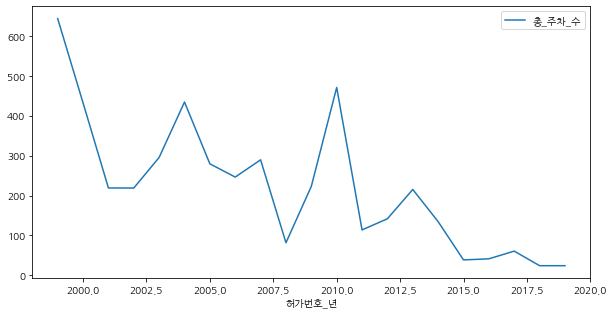

In [10]:
trim_df.pivot_table(values=['총_주차_수'],
                    index='허가번호_년',
                    aggfunc='mean').plot(figsize=(10, 5))
plt.show()

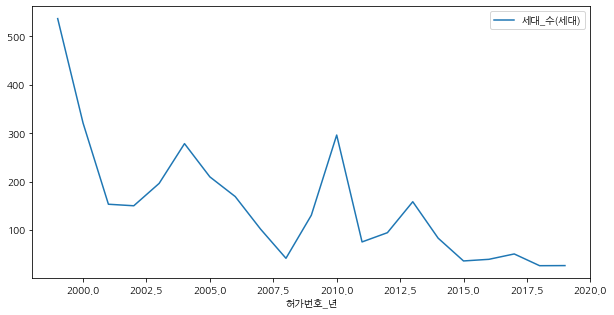

In [11]:
trim_df.pivot_table(values=['세대_수(세대)'],
                    index='허가번호_년',
                    aggfunc='mean').plot(figsize=(10, 5))
plt.show()

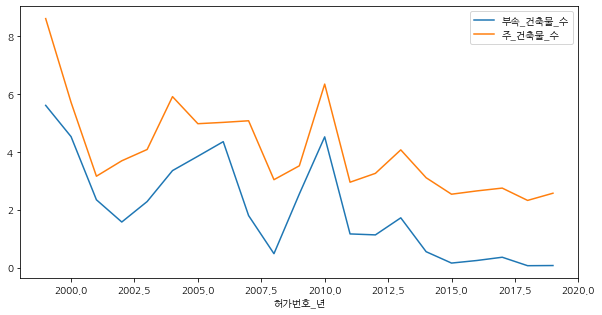

In [12]:
trim_df.pivot_table(values=['주_건축물_수', '부속_건축물_수'],
                    index='허가번호_년',
                    aggfunc='mean').plot(figsize=(10, 5))
plt.show()

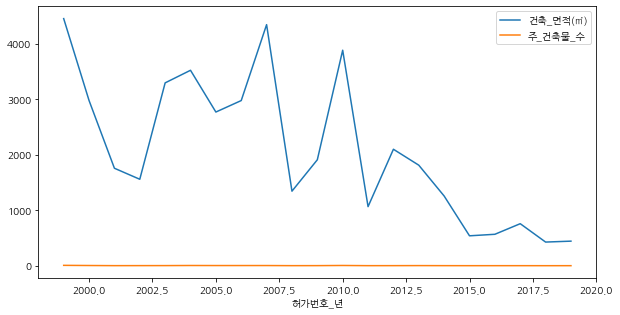

In [18]:
trim_df.pivot_table(values=['건축_면적(㎡)', '연면적(㎡)'],
                    index='허가번호_년',
                    aggfunc='mean').plot(figsize=(10, 5))
plt.show()

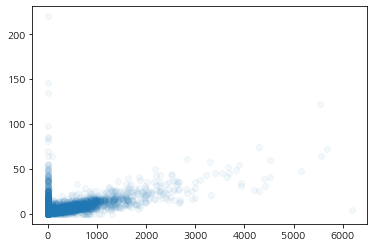

In [19]:
plt.scatter(df['세대_수(세대)'], df['주_건축물_수'], alpha=0.05)
plt.show()

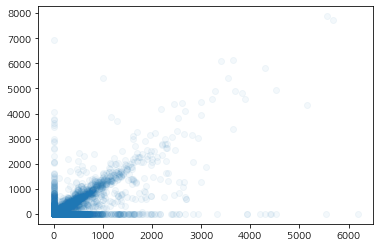

In [15]:
plt.scatter(df['세대_수(세대)'], df['총_주차_수'], alpha=0.05)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


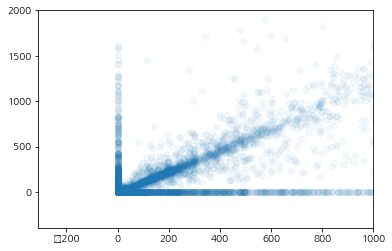

In [16]:
plt.scatter(df['세대_수(세대)'], df['총_주차_수'], alpha=0.05)
plt.xlim(right = 1000)
plt.ylim(top = 2000)
plt.show()

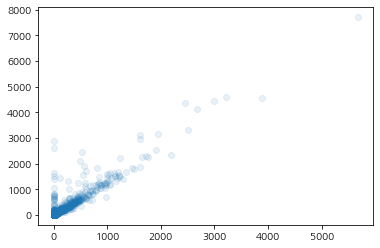

In [17]:
plt.scatter(trim_df['세대_수(세대)'], trim_df['총_주차_수'], alpha=0.1)
plt.show()

## 정리

- 주택허가년도 기준으로 시간이 갈 수록 세데수 건축면적이 전반적으로 감소하는 현상 발견
- 2010년 유별히 트는 건축 붐이 나타난 것으로 보임
- 건축면적 세대수 등의 그래프가 비슷한 형태가 나타나는 것을 보아 상관선이 있어보임
- 세대수와 총 주차수는 아주 큰 상관관계를 보임
- 사실 총 주차수는, 2000년대 초반 법이 바뀌어 의무적으로 된 사전지식이 있어, 해당 현상이 유의미한지 보려고 하였으나 확인 못함

- 지리 정보를 활용하지 못한 점은 미비점
